In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px
from matplotlib import cm
import matplotlib as mpl
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy
import random
import sklearn
import xarray as xr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn import tree
from sklearn.model_selection import cross_validate
import geopandas as gpd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from pathos.threading import ThreadPool as Pool
from sklearn import datasets, linear_model
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [19]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")
out_dir=Path("/mnt/u/LSM root zone/global_sr/output")
fig_dir=Path('/mnt/c/Users/fransjevanoors/surfdrive - Fransje van Oorschot@surfdrive.surf.nl/Fransje/global_SR/global_sr_paper/figures')

## COMPARISON LAN STOCKER

In [11]:
cmap = cm.get_cmap('viridis')

### STOCKER SR

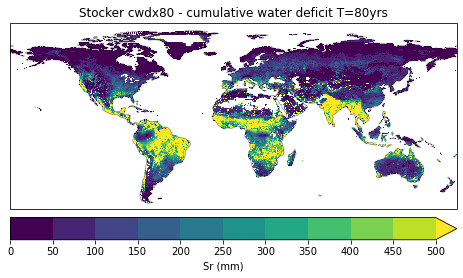

In [16]:
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80.nc')
s = s.cwdx80

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = s.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Stocker cwdx80 - cumulative water deficit T=80yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_stocker_cwdx80.jpg',bbox_inches='tight',dpi=300)


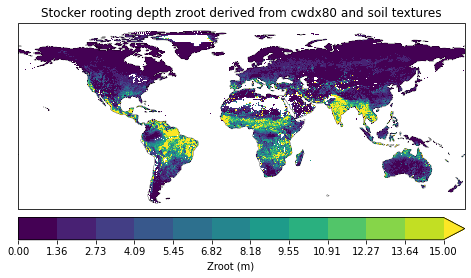

In [15]:
sd = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/zroot_cwd80.nc')
sd = sd.zroot_cwd80/1000 #convert to meters

lvls = np.linspace(0,15,12) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = sd.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Zroot (m)', pad=0.02, ticks = lvls)
ax.set_title(f'Stocker rooting depth zroot derived from cwdx80 and soil textures')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_stocker_zroot_cwd80.jpg',bbox_inches='tight',dpi=300)

### LAN SR

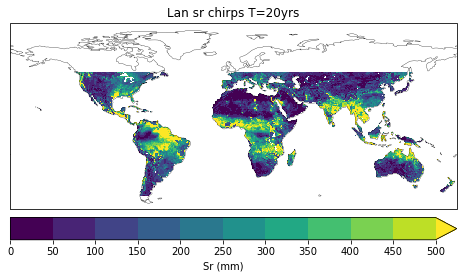

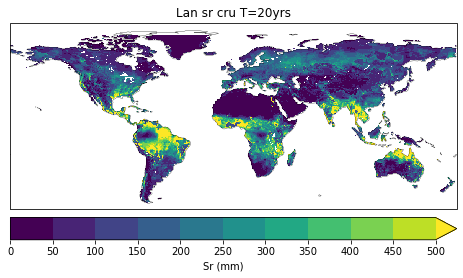

In [17]:
# chirps T20
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_20yrs.nc')
l = l.sr_chirps_20yrs[0]

lvls = np.arange(0,550,50)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps T=20yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_20yrs.jpg',bbox_inches='tight',dpi=300)

# cru T20
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_20yrs.nc')
l = l.sr_cru_20yrs[0]

lvls = np.arange(0,550,50) 
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru T=20yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_20yrs.jpg',bbox_inches='tight',dpi=300)


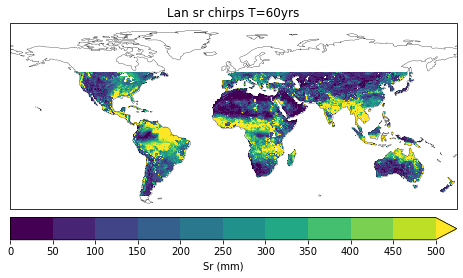

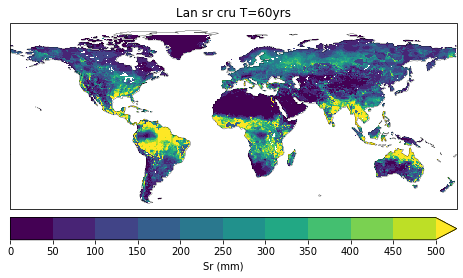

In [18]:
# chirps T60
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_60yrs.nc')
l = l.sr_chirps_60yrs[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps T=60yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_60yrs.jpg',bbox_inches='tight',dpi=300)

# cru T60
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_60yrs.nc')
l = l.sr_cru_60yrs[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru T=60yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_60yrs.jpg',bbox_inches='tight',dpi=300)


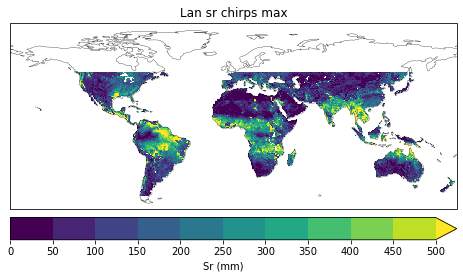

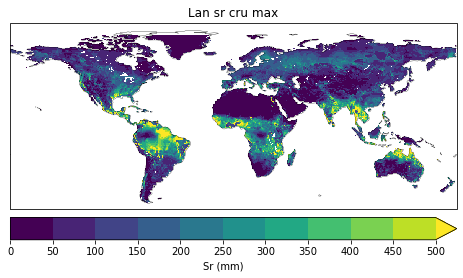

In [19]:
# chirps max
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_max.nc')
l = l.sr_chirps_max[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps max')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_max.jpg',bbox_inches='tight',dpi=300)

# cru max
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_max.nc')
l = l.sr_cru_max[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru max')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_max.jpg',bbox_inches='tight',dpi=300)


### SR COMPARISON

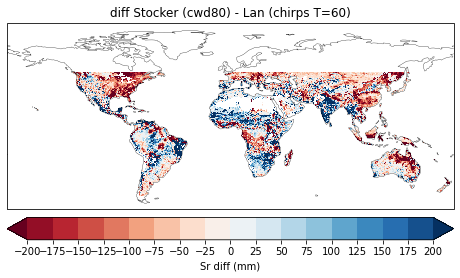

In [20]:
# diff lan-stocker
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80_05grid.nc')
s = s.cwdx80

l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_60yrs.nc')
l = l.sr_chirps_60yrs[0]

d = s-l

lvls = np.linspace(-200,200,17) # scale W-E paper
cmapb = mpl.cm.RdBu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = d.plot(ax=ax, cmap=cmapb, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr diff (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'diff Stocker (cwd80) - Lan (chirps T=60)')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_diff_lan_chirps_60yrs_stocker_cwd80.jpg',bbox_inches='tight',dpi=300)


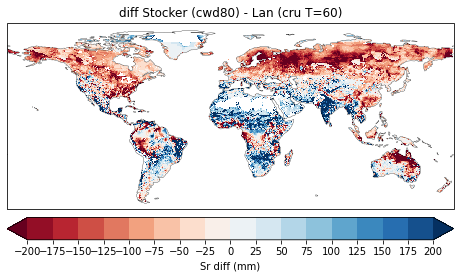

In [21]:
# diff lan-stocker
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80_cru_grid.nc')
s = s.cwdx80

l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_60yrs.nc')
l = l.sr_cru_60yrs[0]

d = s-l

lvls = np.linspace(-200,200,17) # scale W-E paper
cmapb = mpl.cm.RdBu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = d.plot(ax=ax, cmap=cmapb, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr diff (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'diff Stocker (cwd80) - Lan (cru T=60)')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_diff_lan_cru_60yrs_stocker_cwd80.jpg',bbox_inches='tight',dpi=300)


### COMPARE POINT ESTIMATES

In [82]:
#Europe
lat_min_e, lat_max_e = 35,75 # 36,46 only spain cluster
lon_min_e, lon_max_e = -12,29 # -10,5 only spain cluster

#Asia
lat_min_a, lat_max_a = 1,26
lon_min_a, lon_max_a = 68,105

#us
lat_min_u, lat_max_u = 12,65
lon_min_u, lon_max_u = -132,-52

#south america
lat_min_s, lat_max_s = -32,-4
lon_min_s, lon_max_s = -60,-32

#south africa
lat_min_f, lat_max_f = -35.3,-19.3
lon_min_f, lon_max_f = 12,36

#australia
lat_min_t, lat_max_t = -40,-25
lon_min_t, lon_max_t = 140,155

In [83]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv'
df = pd.read_csv(f,index_col=0)
df = df[['sr_20','lon','lat']]
df = df.dropna()
cmap_vd2 = cmap

sr = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments_{data_sources}/sr_combined_gumbelfit_rzyear_{data_sources}.csv', index_col=0)
df['sr_80'] = sr['80.0']

rf = pd.read_csv(f'{work_dir}/output/regression/rf_results_modelb_combined_test.csv',index_col=0)
df['rf_sr'] = rf['Sr_p']
df = df.dropna()

ls = pd.read_csv(f'{work_dir}/output/sr_calculation/stocker_lan_sr_df.csv',index_col=0)
df[ls.columns] = ls[ls.columns]

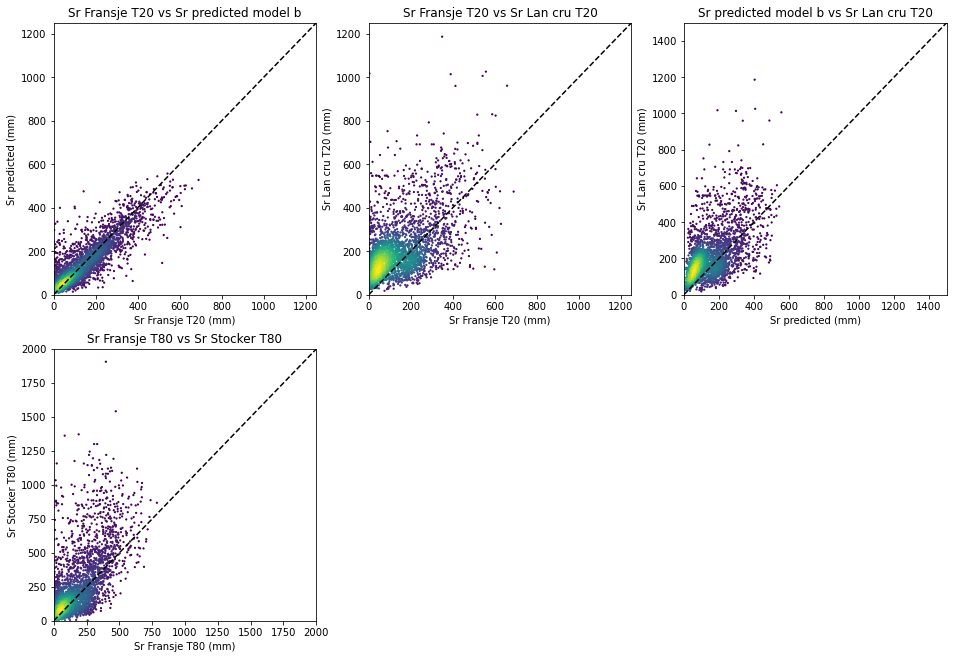

In [94]:
fig = plt.figure(figsize=(16,11))
ax = fig.add_subplot(231)
x = df['sr_20']
y = df['rf_sr']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1250)
ax.set_ylim(0,1250)
ax.set_xlabel('Sr Fransje T20 (mm)')
ax.set_ylabel('Sr predicted (mm)')
ax.set_title('Sr Fransje T20 vs Sr predicted model b')

ax = fig.add_subplot(232)
x = df['sr_20']
y = df['lan_cru_20yrs']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1250)
ax.set_ylim(0,1250)
ax.set_xlabel('Sr Fransje T20 (mm)')
ax.set_ylabel('Sr Lan cru T20 (mm)')
ax.set_title('Sr Fransje T20 vs Sr Lan cru T20')

ax = fig.add_subplot(233)
x = df['rf_sr']
y = df['lan_cru_20yrs']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1500)
ax.set_ylim(0,1500)
ax.set_xlabel('Sr predicted (mm)')
ax.set_ylabel('Sr Lan cru T20 (mm)')
ax.set_title('Sr predicted model b vs Sr Lan cru T20')

ax = fig.add_subplot(234)
x = df['sr_80']
y = df['stocker_cwd80x_mm']
x = x.dropna()
y = y[x.index]
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,2000)
ax.set_ylim(0,2000)
ax.set_xlabel('Sr Fransje T80 (mm)')
ax.set_ylabel('Sr Stocker T80 (mm)')
ax.set_title('Sr Fransje T80 vs Sr Stocker T80')

# ax = fig.add_subplot(234)
# x = df['lan_cru_60yrs']
# y = df['stocker_cwd80x_mm']
# x = x.dropna()
# y = y[x.index]
# y =  y.dropna()
# x = x[y.index]
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# ax.scatter(x,y,c=z,s=1.5)
# ax.plot([0,2000],[0,2000],'k--')
# ax.set_xlim(0,2000)
# ax.set_ylim(0,2000)
# ax.set_xlabel('Sr Lan cru T60 (mm)')
# ax.set_ylabel('Sr Stocker T80 (mm)')
# ax.set_title('Sr Lan cru T60 vs Sr Stocker T80')

# ax = fig.add_subplot(235)
# x = df['lan_chirps_60yrs']
# y = df['stocker_cwd80x_mm']
# x = x.dropna()
# y = y[x.index]
# y =  y.dropna()
# x = x[y.index]
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# ax.scatter(x,y,c=z,s=1.5)
# ax.plot([0,2000],[0,2000],'k--')
# ax.set_xlim(0,2000)
# ax.set_ylim(0,2000)
# ax.set_xlabel('Sr Lan chirps T60 (mm)')
# ax.set_ylabel('Sr Stocker T80 (mm)')
# ax.set_title('Sr Lan chirps T60 vs Sr Stocker T80')
fig.savefig(f'{out_dir}/figures/sr_comparison/points/scatter_sr_comparison.jpg',bbox_inches='tight',dpi=300)


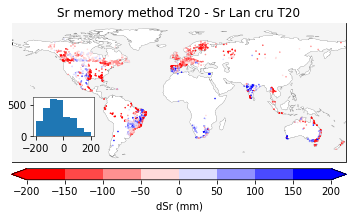

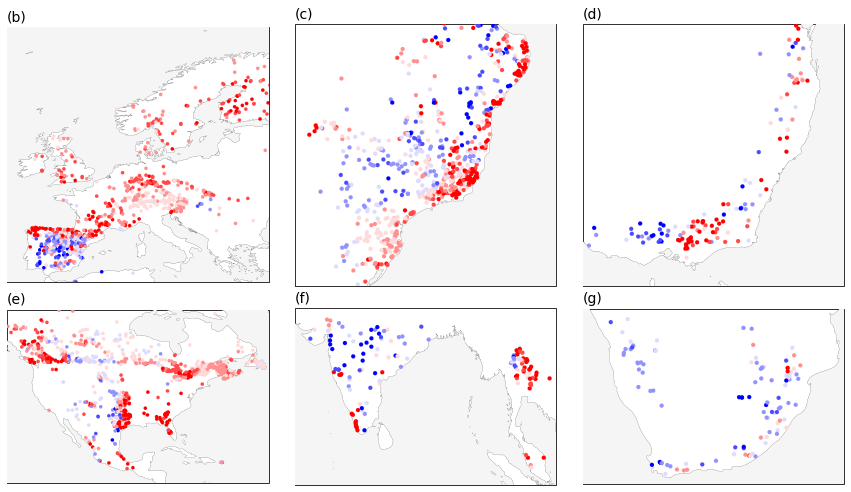

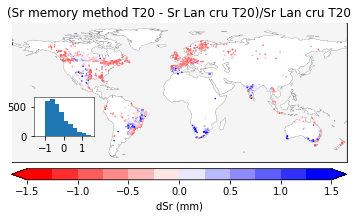

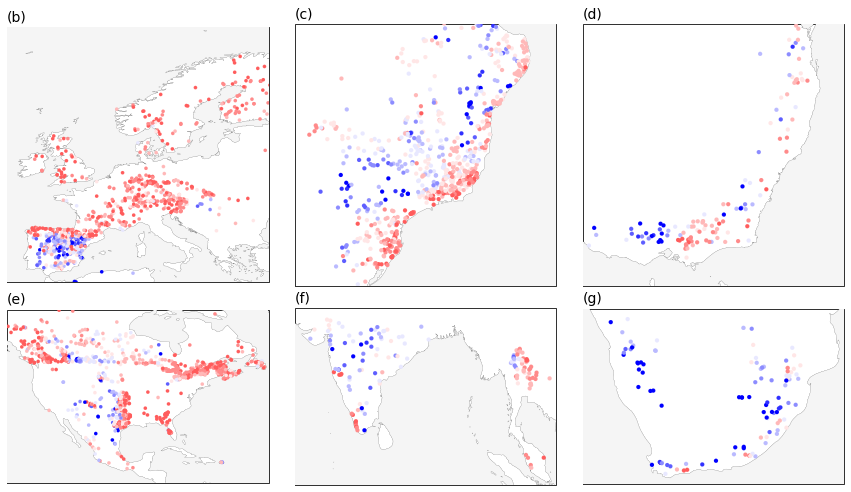

In [96]:
# sr memory method vs Lan cru T20 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-200,200,9)
bounds2 = np.linspace(-200,200,9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['sr_20']-df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr memory method T20 - Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr memory method vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['sr_20']-df['lan_cru_20yrs'])/df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr memory method T20 - Sr Lan cru T20)/Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-rel_2.jpg',bbox_inches='tight',dpi=300)


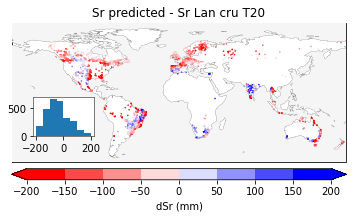

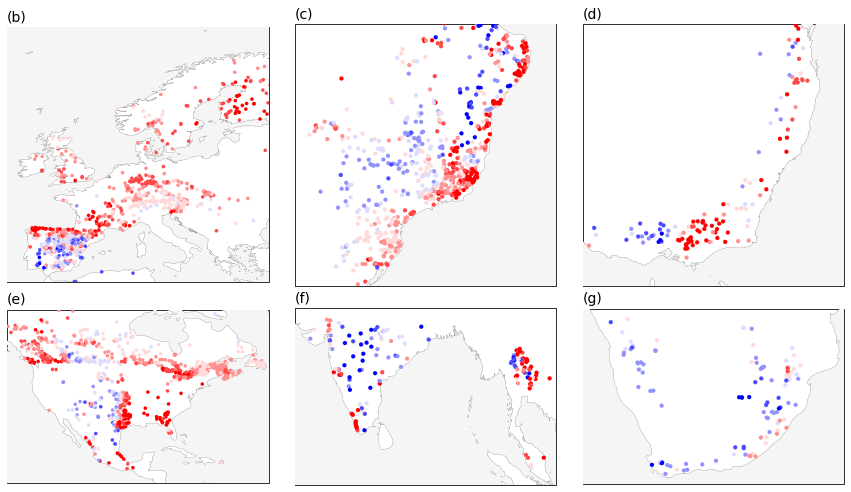

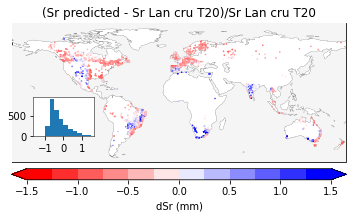

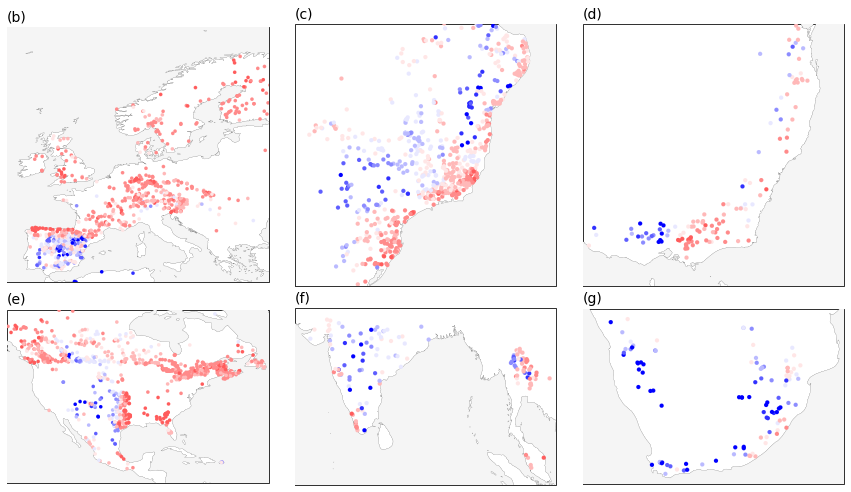

In [97]:
# sr predicted vs Lan cru T20 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-200,200,9)
bounds2 = np.linspace(-200,200,9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['rf_sr']-df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr predicted - Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr predicted vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['rf_sr']-df['lan_cru_20yrs'])/df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr predicted - Sr Lan cru T20)/Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-rel_2.jpg',bbox_inches='tight',dpi=300)


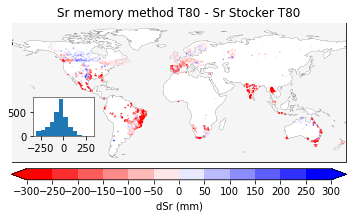

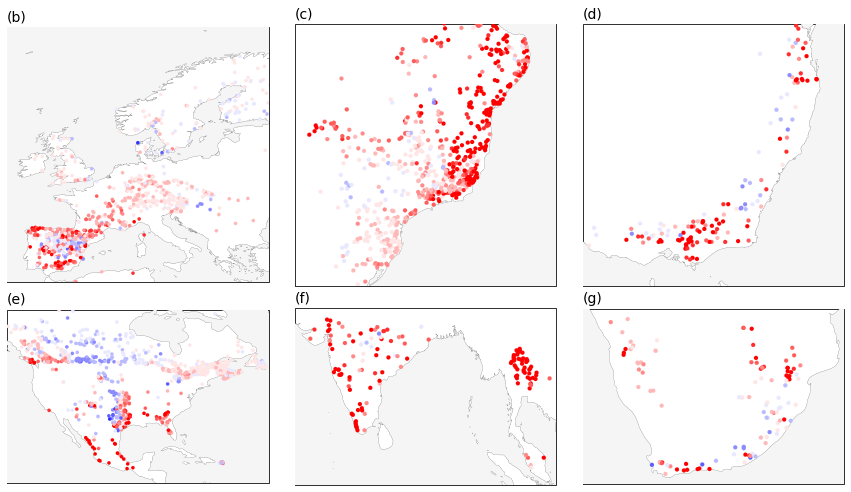

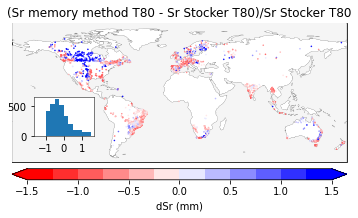

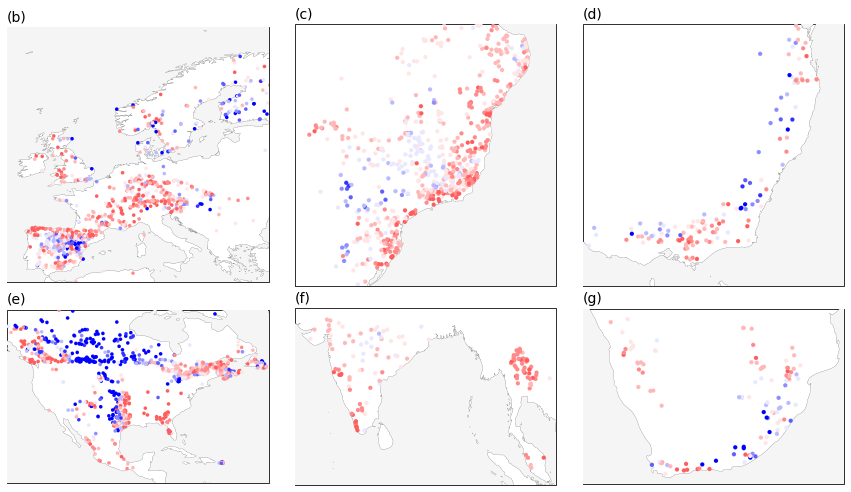

In [99]:
# sr memory method T80 vs Stocker T80 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-300,300,13)
bounds2 = np.linspace(-300,300,13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['sr_20']-df['stocker_cwd80x_mm']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr memory method T80 - Sr Stocker T80',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr memory method vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['sr_80']-df['stocker_cwd80x_mm'])/df['stocker_cwd80x_mm']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr memory method T80 - Sr Stocker T80)/Sr Stocker T80',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-rel_2.jpg',bbox_inches='tight',dpi=300)


## gridded variables

In [38]:
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_gswp3_land.nc')
t = xr.open_dataset(f'{work_dir}/output/gridded_sr/t_mean_gswp3_land.nc')
idu = xr.open_dataset(f'{work_dir}/output/gridded_sr/idu_mean_land.nc')
asi = xr.open_dataset(f'{work_dir}/output/gridded_sr/asi_land.nc')

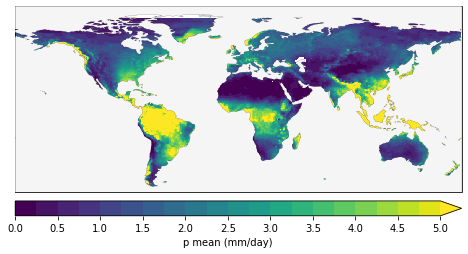

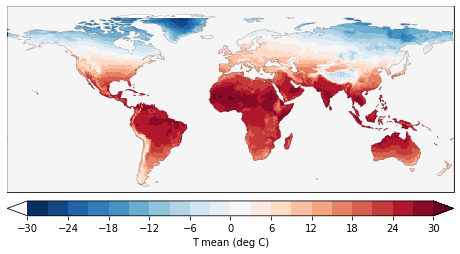

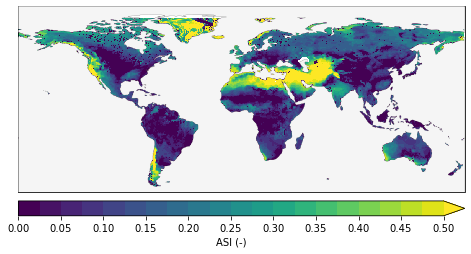

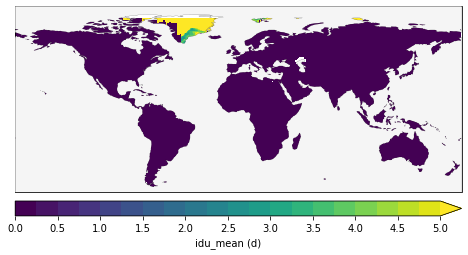

In [48]:
# p mean
lvls = np.linspace(0,5,21)
lvls2 = np.linspace(0,5,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = p.pr[0,:,:].plot(ax=ax, cmap='viridis',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='p mean (mm/day)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)
ax.set_title('')

# t mean
lvls = np.linspace(-30,30,21)
lvls2 = np.linspace(-30,30,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = t.tas[0,:,:].plot(ax=ax, cmap='RdBu_r',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='T mean (deg C)',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=lvls2)
ax.set_title('')

# asi
lvls = np.linspace(0,0.5,21)
lvls2 = np.linspace(0,0.5,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = asi.asi[:,:].plot(ax=ax, cmap='viridis',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='ASI (-)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)

# idu mean
lvls = np.linspace(0,5,21)
lvls2 = np.linspace(0,5,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = idu.idu_mean[:,:].plot(ax=ax, cmap='viridis',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='idu_mean (d)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)


## Apply RF to gridded data

In [55]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
min_samples_leaf=1
max_depth=None
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
features = ['p_mean','t_mean', 'asi']

In [56]:
df

,p_mean,ep_mean,t_mean,tdiff_mean,idu_mean,si_ep,si_p,asi,dtb,ia,...,nonveg,pclay,psand,lai_mean,lai_rsd,sc_mean,sc_rsd,sr_20,lat,lon
ca_0002351,1.590253,1.401269,0.643260,25.221876,5.05,0.704030,0.464383,0.000000,19.41,0.003286,...,0.294740,17.094944,45.838508,0.950806,0.641162,41.416667,0.833385,86.691569,51.0146,-114.0896
cz_0000019,2.285853,1.484881,7.528472,22.165638,3.81,0.554593,0.213216,0.024284,18.85,0.000002,...,0.180999,16.322265,42.762079,1.885474,0.753561,25.416667,1.311083,51.681945,49.7604,16.9729
br_0001191,4.152597,3.260944,24.602384,4.562576,2.67,0.138040,0.173603,0.121069,25.74,0.003675,...,0.073967,36.166791,44.203801,2.808409,0.113255,0.000000,0.000000,173.824040,-13.3646,-39.0813
br_0000469,4.944120,3.258352,26.827793,2.495693,6.62,0.049197,0.609147,0.114847,25.93,0.000325,...,0.248321,28.315328,54.128498,1.862262,0.252759,0.000000,0.000000,333.062414,-6.6729,-48.4688
bw_0000006,1.358820,2.669859,20.623299,10.890681,12.46,0.245236,0.838107,0.037922,10.34,0.000000,...,0.241470,21.254629,69.722858,0.581395,0.657466,0.000000,0.000000,221.777925,-21.0896,27.5146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
in_0000089,3.441414,2.745652,25.608996,14.829664,16.92,0.210800,1.109515,0.322650,25.37,0.043494,...,0.154576,39.353040,35.526416,0.903943,0.637682,0.000000,0.000000,579.898952,22.3812,79.8979
br_0000128,5.936997,4.090981,27.015993,2.138738,4.50,0.042521,0.594381,0.000000,20.76,0.000078,...,0.036179,36.896956,45.727135,5.570754,0.016118,0.000000,0.000000,417.746791,0.5146,-60.4646
ca_0000419,2.655707,1.932424,4.734362,31.055583,3.20,0.614406,0.209588,0.162576,10.92,0.000000,...,0.139072,14.190407,54.128959,2.142158,0.828244,35.750000,1.228926,72.704485,46.4812,-82.6479
in_0000016,2.526809,2.758476,26.032707,14.215958,22.23,0.231387,1.208023,0.353852,103.50,0.066091,...,0.210589,43.024103,29.583296,0.678283,0.707684,0.000000,0.000000,374.161605,23.3521,74.7187


In [57]:
sr_rp = 'sr_20'
df['catch_id'] = df.index
ll = ['lat','lon','catch_id']
f = features + ll
dfx = df[f].values
dfy = df[sr_rp].values

# train_ix = cv_train_ix[0]
# test_ix = cv_test_ix[0]

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1).ravel(), test_size=0.3, random_state=42)
# X_train = dfx[train_ix]
# y_train = dfy[train_ix]
# X_test = dfx[test_ix]
# y_test = dfy[test_ix]

# save lat lon columns
lat_train = X_train[:,-3]
lon_train = X_train[:,-2]
lat_test = X_test[:,-3]
lon_test = X_test[:,-2]
catch_id_train = X_train[:,-1]
catch_id_test = X_test[:,-1]
# remove lat lon columns
X_train = np.delete(X_train,-1,1)
X_train = np.delete(X_train,-1,1)
X_train = np.delete(X_train,-1,1)
X_test = np.delete(X_test,-1,1)
X_test = np.delete(X_test,-1,1)
X_test = np.delete(X_test,-1,1)

rf = RandomForestRegressor(criterion='absolute_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
# rf = RandomForestRegressor(criterion='squared_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth,oob_score=True)
rf = rf.fit(X_train, y_train)
train_y_pred = rf.predict(X_train)

In [58]:
X_train

array([[4.149464357393212, 20.502004917723863, 0.0],
       [1.773501963817952, 2.336782789970092, 0.1633058556819075],
       [1.833079225549142, 17.17572444418215, 0.4743625045258109],
       ...,
       [2.929233313878447, 25.58833403782972, 0.143492939547561],
       [3.215744932742335, 3.189551399414806, 0.0972183748064119],
       [2.5650606011759765, 6.816446026325397, 0.0952207844958232]],
      dtype=object)

In [59]:
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_gswp3_land.nc')
t = xr.open_dataset(f'{work_dir}/output/gridded_sr/t_mean_gswp3_land.nc')
idu = xr.open_dataset(f'{work_dir}/output/gridded_sr/idu_mean_land.nc')
asi = xr.open_dataset(f'{work_dir}/output/gridded_sr/asi_land.nc')

p_array = p.pr.to_numpy().flatten()
t_array = t.tas.to_numpy().flatten()
asi_array = asi.asi.to_numpy().flatten()

In [60]:
lat_array = []
lon_array = []
for m in range(len(p.lat.values)):
    for n in range(len(p.lon.values)):
        lat_array.append(p.lat.values[m])
        lon_array.append(p.lon.values[n])

In [61]:
df = pd.DataFrame(index=np.arange(0,195840,1), columns=['lat','lon','p_mean','t_mean','asi'])
df.loc[:,'lat'] = lat_array
df.loc[:,'lon'] = lon_array
df.loc[:,'p_mean'] = p_array
df.loc[:,'t_mean'] = t_array
df.loc[:,'asi'] = asi_array
df = df.dropna()
df

,lat,lon,p_mean,t_mean,asi
162,80.0,-99.0,0.425798,-16.261503,0.248962
163,80.0,-98.5,0.615029,-10.837053,0.000000
167,80.0,-96.5,0.424991,-19.021343,0.258613
168,80.0,-96.0,0.364311,-19.563467,0.260750
169,80.0,-95.5,0.328942,-19.961914,0.264746
...,...,...,...,...,...
194688,-55.0,-36.0,4.526140,0.229306,0.000000
195340,-55.5,-70.0,3.416511,5.362623,0.000000
195341,-55.5,-69.5,3.097762,5.173202,0.136494
195342,-55.5,-69.0,2.668537,4.999141,0.000000


In [62]:
dfx = df[features].values
test_y_pred = rf.predict(dfx)
df['sr_pred'] = test_y_pred
df

,lat,lon,p_mean,t_mean,asi,sr_pred
162,80.0,-99.0,0.425798,-16.261503,0.248962,41.144136
163,80.0,-98.5,0.615029,-10.837053,0.000000,73.465347
167,80.0,-96.5,0.424991,-19.021343,0.258613,38.518687
168,80.0,-96.0,0.364311,-19.563467,0.260750,38.243628
169,80.0,-95.5,0.328942,-19.961914,0.264746,36.819751
...,...,...,...,...,...,...
194688,-55.0,-36.0,4.526140,0.229306,0.000000,13.171203
195340,-55.5,-70.0,3.416511,5.362623,0.000000,22.824447
195341,-55.5,-69.5,3.097762,5.173202,0.136494,47.063670
195342,-55.5,-69.0,2.668537,4.999141,0.000000,38.626187


In [63]:
df2 = pd.DataFrame(index=np.arange(0,195840,1), columns=['lat','lon','sr_pred'])
df2.loc[:,'lat'] = lat_array
df2.loc[:,'lon'] = lon_array
df2.sr_pred = df['sr_pred']
df2

,lat,lon,sr_pred
0,80.0,-180.0,NaN
1,80.0,-179.5,NaN
2,80.0,-179.0,NaN
3,80.0,-178.5,NaN
4,80.0,-178.0,NaN
...,...,...,...
195835,-55.5,177.5,NaN
195836,-55.5,178.0,NaN
195837,-55.5,178.5,NaN
195838,-55.5,179.0,NaN


In [64]:
# dataframe to 2d xarray
srp = np.zeros([len(p.lat.values),len(p.lon.values)])
i=0
for n in range(len(p.lat.values)):
    for m in range(len(p.lon.values)):
        srp[n,m] = df2.sr_pred[i]
        i+=1
lon = p.lon.values
lat = p.lat.values
data_xr = xr.DataArray(srp,
                       coords={'lat':lat,'lon':lon},
                       dims=['lat','lon'],
                       name='sr_p')

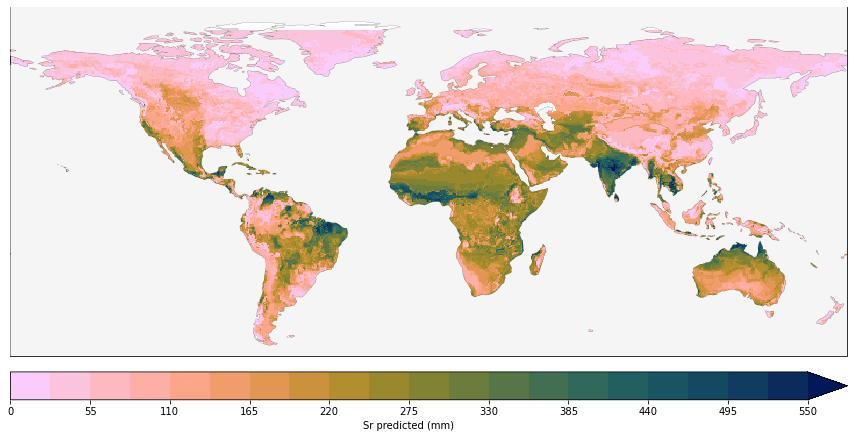

In [68]:
# sr predicted
from cmcrameri import cm
cmap_rdbu = cm.batlow_r
# cmap_rdbu = cm.get_cmap('viridis')
bounds = np.linspace(0, 550,21)
bounds2 = np.linspace(0,550,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

fig2 = plt.figure(figsize=(15,15))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
# a = ax.scatter(pred.lon,pred.lat,c=pred.sr_pred,cmap=cmap_rdbu,norm=norm)
a = data_xr[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='Sr predicted (mm)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)


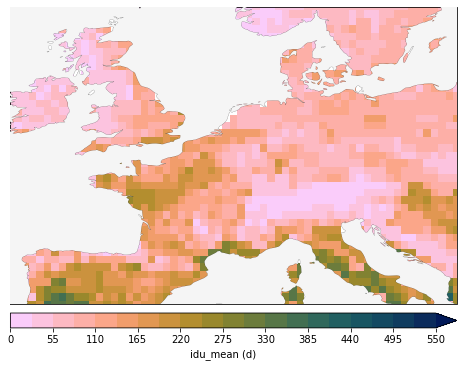

In [69]:
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-10,20)
ax.set_ylim(40,60)
# a = ax.scatter(pred.lon,pred.lat,c=pred.sr_pred,cmap=cmap_rdbu,norm=norm)
a = data_xr[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='idu_mean (d)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
